In [1]:
# Importing necessary libraries for time series analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.api import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

In [3]:
# Read in the data
df = pd.read_csv('/Users/helenamabey/Stats_Spring_2025/Congestion Cleaned.csv')
df.head()

,Date,Month Year,Daily Vehicle Count,Regular Gas Price Average,Midgrade Gas Price Average,Premium Gas Price Average,Monthly_Max_Temp,Monthly_Min_Temp,Monthly_Sum_Precipitation,Monthly_Snowfall
0,2005-01-01,2005-01,19470,1.7660,1.8760,1.9800,32.3,12.7,2.29,36.0
1,2005-02-01,2005-02,21207,1.8550,1.9650,2.0650,33.9,10.5,2.14,37.5
2,2005-03-01,2005-03,22943,2.0825,2.1900,2.2875,39.5,17.5,1.49,20.0
3,2005-04-01,2005-04,21288,2.2300,2.3425,2.4450,49.9,24.0,2.24,20.0
4,2005-05-01,2005-05,23505,2.1540,2.2640,2.3640,62.1,30.5,1.01,2.0


In [5]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [7]:
# Define independent variables (ONLY the selected ones)
X = df[['Monthly_Max_Temp', 'Monthly_Min_Temp', 'Monthly_Sum_Precipitation']]

# Define dependent variable
y = df['Daily Vehicle Count']

# Add a constant for the intercept
X = sm.add_constant(X)

In [9]:
# Train-test split (Train: before 2017, Test: 2017)
train_mask = df.index.year < 2017
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

# Ensure index alignment before fitting
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

In [11]:
# Fit the OLS model
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())


                             OLS Regression Results                            
Dep. Variable:     Daily Vehicle Count   R-squared:                       0.684
Model:                             OLS   Adj. R-squared:                  0.677
Method:                  Least Squares   F-statistic:                     101.1
Date:                 Fri, 07 Mar 2025   Prob (F-statistic):           7.33e-35
Time:                         19:29:32   Log-Likelihood:                -1292.4
No. Observations:                  144   AIC:                             2593.
Df Residuals:                      140   BIC:                             2605.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

In [13]:
# Keep only the most relevant variable
X_selected = df[['Monthly_Max_Temp']]  # Dropping weak predictors

# Add a constant for the intercept
X_selected = sm.add_constant(X_selected)

# Train-test split (Train: before 2017, Test: 2017)
train_mask = df.index.year < 2017
X_train, X_test = X_selected[train_mask], X_selected[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

# Fit the new model
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())

                             OLS Regression Results                            
Dep. Variable:     Daily Vehicle Count   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.680
Method:                  Least Squares   F-statistic:                     304.8
Date:                 Fri, 07 Mar 2025   Prob (F-statistic):           3.65e-37
Time:                         19:31:13   Log-Likelihood:                -1292.8
No. Observations:                  144   AIC:                             2590.
Df Residuals:                      142   BIC:                             2596.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.525e+04   

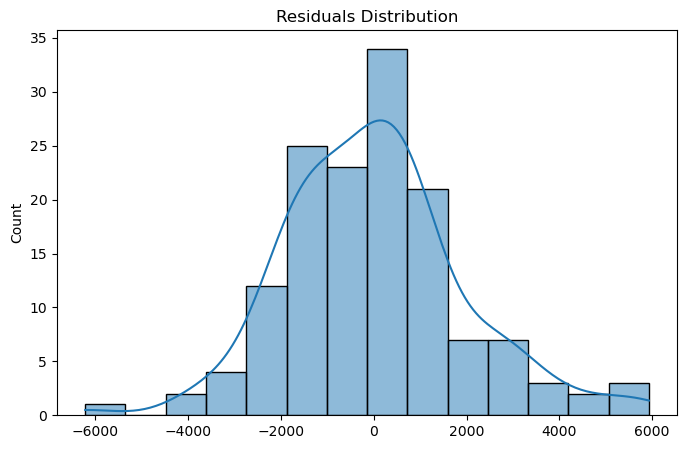

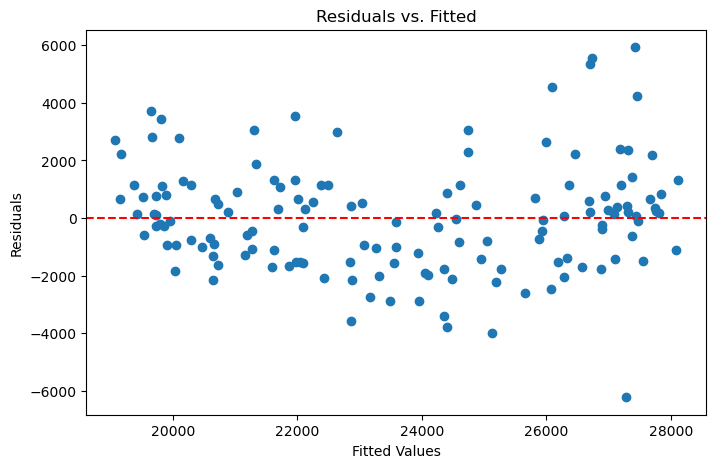

In [15]:
import seaborn as sns

# Get residuals
residuals = model_sm.resid

# Histogram of residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Residuals vs. Fitted Values
plt.figure(figsize=(8,5))
plt.scatter(model_sm.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

In [17]:
# Log-transform the target variable
y_train_log = np.log(y_train)

# Fit model with log-transformed target
model_sm_log = sm.OLS(y_train_log, X_train).fit()

# Print summary
print(model_sm_log.summary())


                             OLS Regression Results                            
Dep. Variable:     Daily Vehicle Count   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.693
Method:                  Least Squares   F-statistic:                     323.6
Date:                 Fri, 07 Mar 2025   Prob (F-statistic):           1.94e-38
Time:                         19:34:44   Log-Likelihood:                 163.94
No. Observations:                  144   AIC:                            -323.9
Df Residuals:                      142   BIC:                            -317.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.7114   

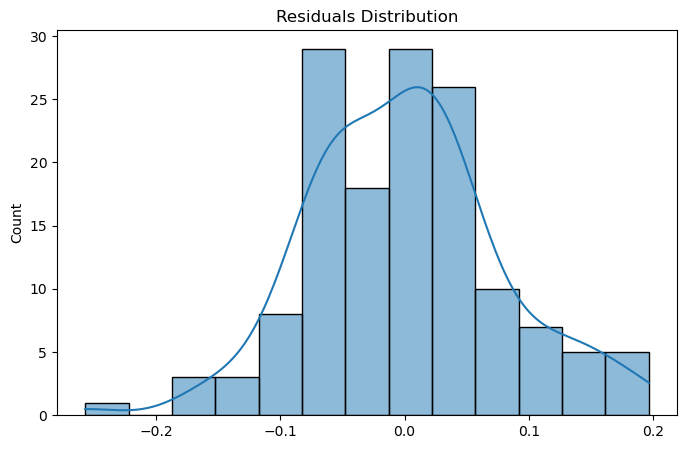

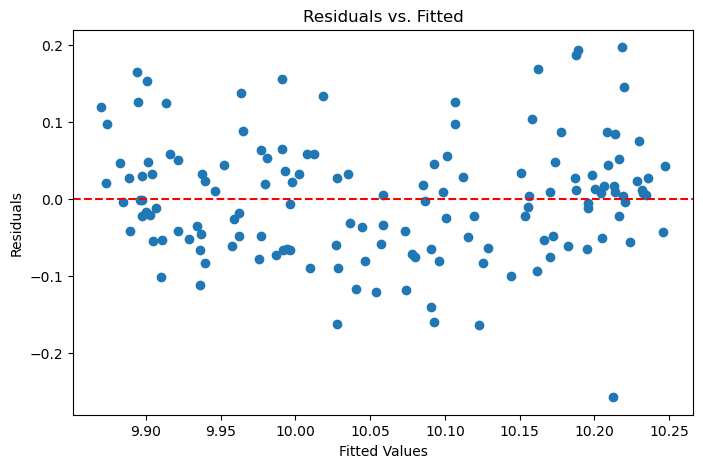

In [19]:
# Get residuals
residuals_log = model_sm_log.resid

# Histogram of residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals_log, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Residuals vs. Fitted Values
plt.figure(figsize=(8,5))
plt.scatter(model_sm_log.fittedvalues, residuals_log)
plt.axhline(y=0, color='r', linestyle='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

In [21]:
y_pred_log = model_sm_log.predict(X_test)

# Convert back from log-scale
y_pred_original_scale = np.exp(y_pred_log)

# Compare actual vs predicted values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_original_scale})
print(predictions_df)

            Actual     Predicted
Date                            
2017-01-01   21883  19682.691555
2017-02-01   23391  21552.565382


In [23]:
# Calculate correction factor for log transformation bias
residuals_log = model_sm_log.resid
correction_factor = np.exp(residuals_log.var() / 2)

# Adjust predictions
y_pred_corrected = y_pred_original_scale * correction_factor

# Compare corrected predictions
predictions_df['Corrected_Predicted'] = y_pred_corrected
print(predictions_df)

            Actual     Predicted  Corrected_Predicted
Date                                                 
2017-01-01   21883  19682.691555         19742.309249
2017-02-01   23391  21552.565382         21617.846812


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Compare R² scores
print(f"Linear Model R²: {model_sm_log.rsquared:.4f}")
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf):.4f}")

Linear Model R²: 0.6950
Random Forest R²: -4.8087


In [27]:
# Select features (adding back Monthly_Min_Temp)
X_selected = df[['Monthly_Max_Temp', 'Monthly_Min_Temp']]

# Add intercept
X_selected = sm.add_constant(X_selected)

# Train-test split (Train: before 2017, Test: 2017)
train_mask = df.index.year < 2017
X_train, X_test = X_selected[train_mask], X_selected[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

# Log-transform the target variable
y_train_log = np.log(y_train)

# Fit model with log-transformed target
model_sm_log = sm.OLS(y_train_log, X_train).fit()

# Print new model summary
print(model_sm_log.summary())

                             OLS Regression Results                            
Dep. Variable:     Daily Vehicle Count   R-squared:                       0.696
Model:                             OLS   Adj. R-squared:                  0.692
Method:                  Least Squares   F-statistic:                     161.7
Date:                 Fri, 07 Mar 2025   Prob (F-statistic):           3.19e-37
Time:                         19:41:19   Log-Likelihood:                 164.28
No. Observations:                  144   AIC:                            -322.6
Df Residuals:                      141   BIC:                            -313.6
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.7436   

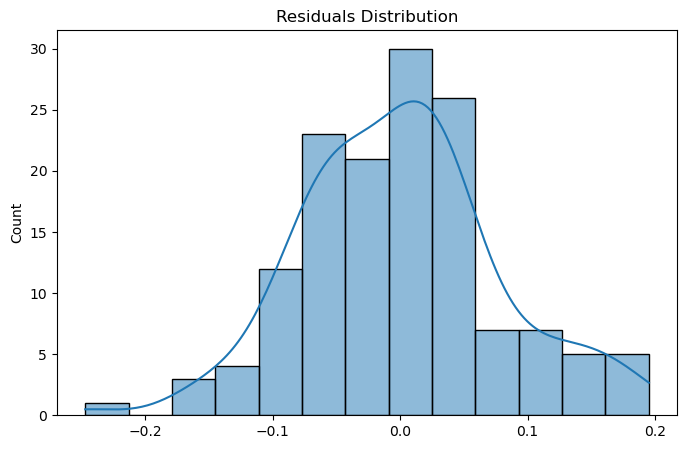

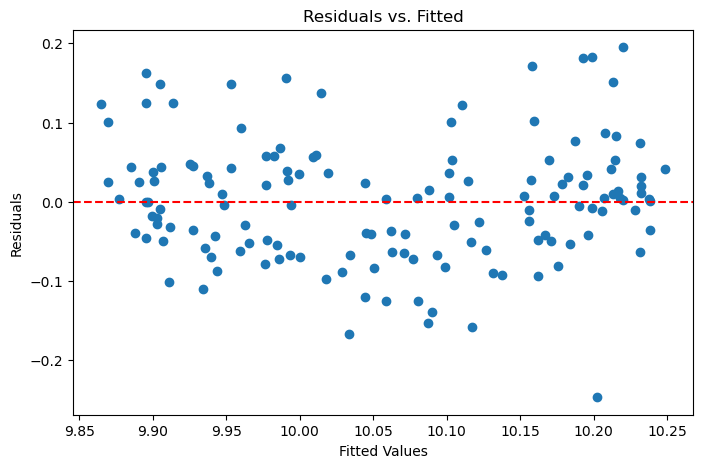

In [29]:
# Get residuals
residuals_log_2 = model_sm_log.resid

# Histogram of residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals_log_2, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Residuals vs. Fitted Values
plt.figure(figsize=(8,5))
plt.scatter(model_sm_log.fittedvalues, residuals_log_2)
plt.axhline(y=0, color='r', linestyle='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

In [33]:
# Predict on test data (log scale)
y_pred_log = model_sm_log.predict(X_test)

# Convert back to original scale (with correction factor)
correction_factor = np.exp(model_sm_log.resid.var() / 2)
y_pred_original_scale = np.exp(y_pred_log) * correction_factor

# Compare predictions with actual values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_original_scale})
print(predictions_df)


            Actual     Predicted
Date                            
2017-01-01   21883  19850.333227
2017-02-01   23391  21814.832753


In [35]:
# Keep only Monthly_Max_Temp
X_selected = df[['Monthly_Max_Temp']]
X_selected = sm.add_constant(X_selected)

# Re-run train-test split
X_train, X_test = X_selected[train_mask], X_selected[~train_mask]

# Refit the log model
model_sm_log = sm.OLS(y_train_log, X_train).fit()

# Print summary
print(model_sm_log.summary())

                             OLS Regression Results                            
Dep. Variable:     Daily Vehicle Count   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.693
Method:                  Least Squares   F-statistic:                     323.6
Date:                 Fri, 07 Mar 2025   Prob (F-statistic):           1.94e-38
Time:                         19:47:28   Log-Likelihood:                 163.94
No. Observations:                  144   AIC:                            -323.9
Df Residuals:                      142   BIC:                            -317.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.7114   

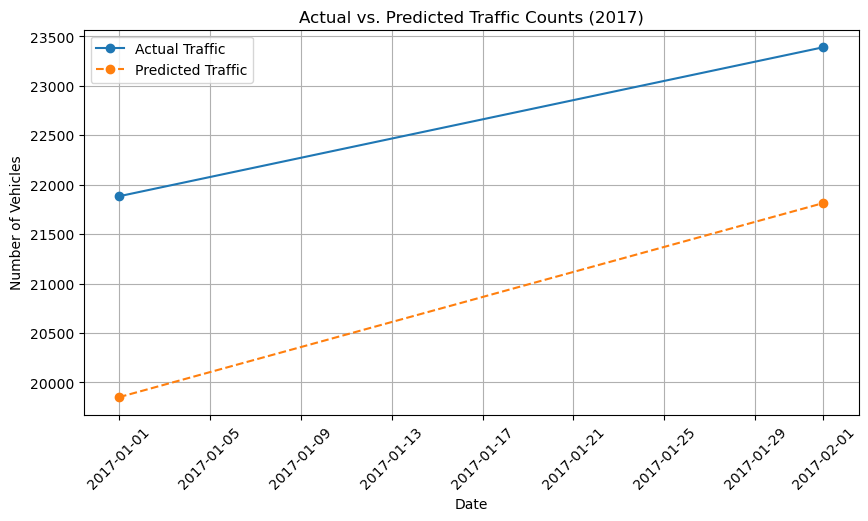

In [37]:
# Plot actual vs predicted traffic counts
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Actual Traffic", marker="o", linestyle="-")
plt.plot(y_test.index, y_pred_original_scale, label="Predicted Traffic", marker="o", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Number of Vehicles")
plt.title("Actual vs. Predicted Traffic Counts (2017)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

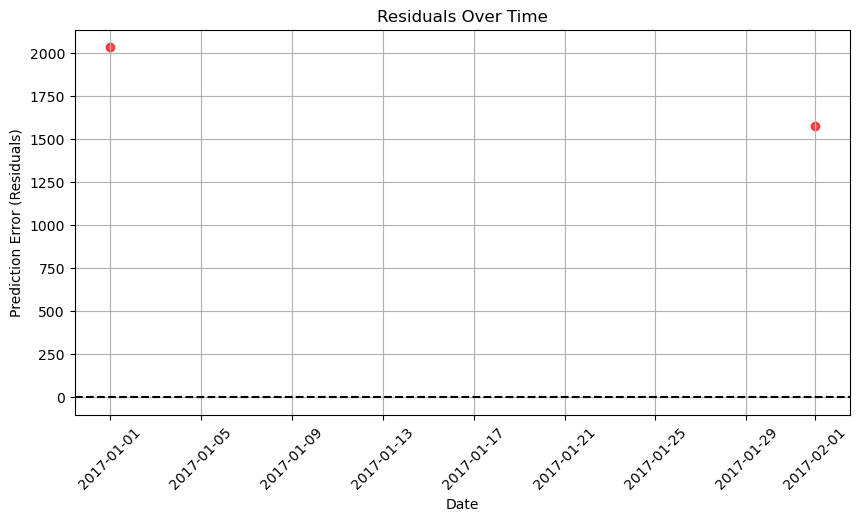

In [39]:
residuals = y_test - y_pred_original_scale

plt.figure(figsize=(10,5))
plt.scatter(y_test.index, residuals, color='red', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Prediction Error (Residuals)")
plt.title("Residuals Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [41]:
# Create a date range for March - December 2017
future_dates = pd.date_range(start="2017-03-01", end="2017-12-01", freq="MS")

# Estimate Monthly_Max_Temp based on previous years (mean temp for each month)
monthly_avg_temp = df.groupby(df.index.month)['Monthly_Max_Temp'].mean()

# Assign estimated Monthly_Max_Temp based on historical averages
future_temps = [monthly_avg_temp[date.month] for date in future_dates]

# Create future DataFrame
future_df = pd.DataFrame({
    'Date': future_dates,
    'Monthly_Max_Temp': future_temps
})

# Set index and add constant for regression
future_df.set_index("Date", inplace=True)
future_df = sm.add_constant(future_df)

print(future_df.head())  # Check the future dataset

            const  Monthly_Max_Temp
Date                               
2017-03-01    1.0         41.833333
2017-04-01    1.0         49.208333
2017-05-01    1.0         59.350000
2017-06-01    1.0         72.100000
2017-07-01    1.0         76.766667


In [43]:
# Predict on future data (log scale)
future_pred_log = model_sm_log.predict(future_df)

# Convert back to original scale with correction factor
future_pred_original_scale = np.exp(future_pred_log) * correction_factor

# Create DataFrame for results
future_predictions_df = pd.DataFrame({
    'Predicted_Vehicle_Count': future_pred_original_scale
}, index=future_dates)

print(future_predictions_df)

            Predicted_Vehicle_Count
2017-03-01             21929.809901
2017-04-01             23044.476880
2017-05-01             24670.410567
2017-06-01             26878.261074
2017-07-01             27734.856813
2017-08-01             27123.305553
2017-09-01             25933.094558
2017-10-01             23825.562431
2017-11-01             21589.710403
2017-12-01             20000.297891


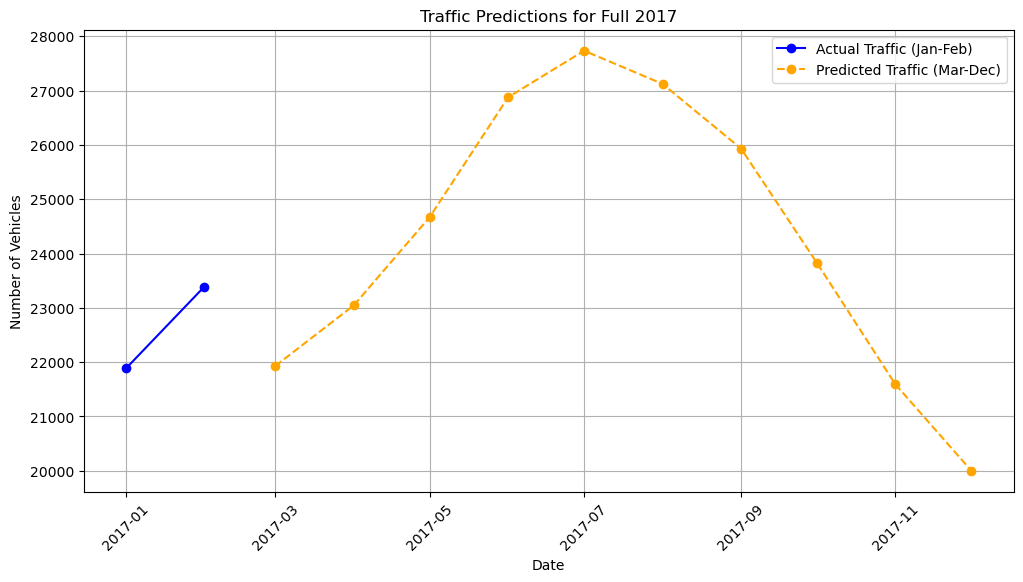

In [45]:
# Combine actual and predicted data
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Traffic (Jan-Feb)", marker="o", linestyle="-", color="blue")
plt.plot(future_predictions_df.index, future_predictions_df['Predicted_Vehicle_Count'], 
         label="Predicted Traffic (Mar-Dec)", marker="o", linestyle="dashed", color="orange")

plt.xlabel("Date")
plt.ylabel("Number of Vehicles")
plt.title("Traffic Predictions for Full 2017")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [47]:
# Extract 2016 data
traffic_2016 = df.loc["2016", "Daily Vehicle Count"]

In [51]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    '2016 Traffic': traffic_2016.values,  # Actual 2016
    '2017 Traffic': pd.concat([y_test, future_predictions_df['Predicted_Vehicle_Count']])  # 2017 Actual + Predicted
})

# Set the index (months)
comparison_df.index = pd.date_range(start="2016-01-01", periods=12, freq="MS")

comparison_df.head()

,2016 Traffic,2017 Traffic
2016-01-01,22470,21883.000000
2016-02-01,20829,23391.000000
2016-03-01,25512,21929.809901
2016-04-01,23563,23044.476880
2016-05-01,27800,24670.410567


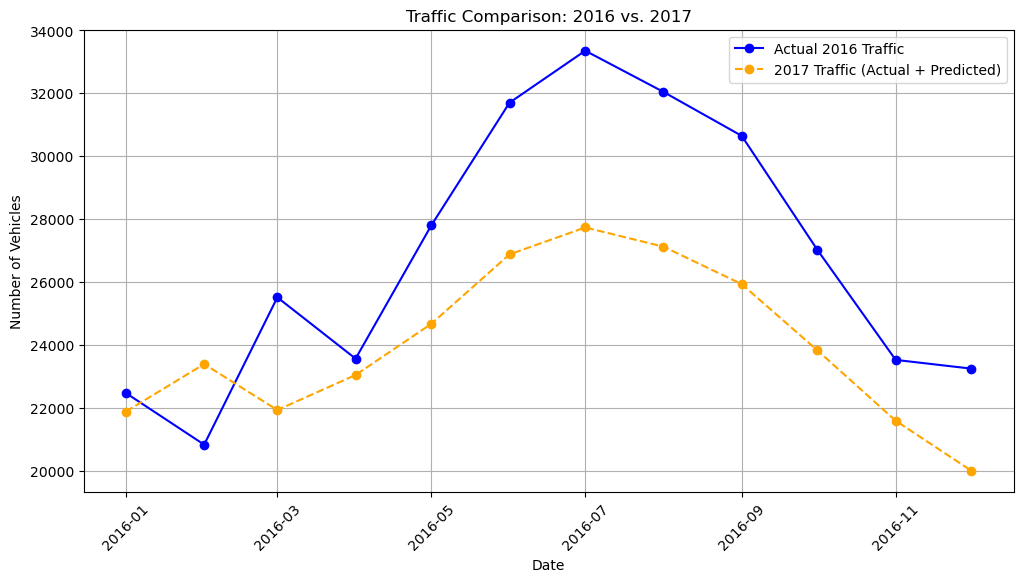

In [53]:
plt.figure(figsize=(12, 6))

# Plot 2016 Actual Data
plt.plot(comparison_df.index, comparison_df['2016 Traffic'], 
         label="Actual 2016 Traffic", marker="o", linestyle="-", color="blue")

# Plot 2017 Actual + Predicted Data
plt.plot(comparison_df.index, comparison_df['2017 Traffic'], 
         label="2017 Traffic (Actual + Predicted)", marker="o", linestyle="dashed", color="orange")

plt.xlabel("Date")
plt.ylabel("Number of Vehicles")
plt.title("Traffic Comparison: 2016 vs. 2017")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [55]:
# Define independent variable (only Monthly Max Temp)
X_selected = df[['Monthly_Max_Temp']]
X_selected = sm.add_constant(X_selected)

# 70/30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=42, shuffle=True)

# Log-transform the target variable
y_train_log = np.log(y_train)

# Fit the new model
model_sm_log = sm.OLS(y_train_log, X_train).fit()

# Print summary
print(model_sm_log.summary())

                             OLS Regression Results                            
Dep. Variable:     Daily Vehicle Count   R-squared:                       0.681
Model:                             OLS   Adj. R-squared:                  0.678
Method:                  Least Squares   F-statistic:                     213.4
Date:                 Fri, 07 Mar 2025   Prob (F-statistic):           1.51e-26
Time:                         20:04:40   Log-Likelihood:                 122.63
No. Observations:                  102   AIC:                            -241.3
Df Residuals:                      100   BIC:                            -236.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.7297   